# MLP (sklearn)

In [1]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.datasets import load_diabetes, load_digits

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import numpy as np

## `Data()`

In [2]:
X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [6]:
# Count the number of samples in each class
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)

Class counts before balancing: {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}
Class counts after balancing: {0: 174, 1: 174, 2: 174, 3: 174, 4: 174, 5: 174, 6: 174, 7: 174, 8: 174, 9: 174}


New balanced dataset shape: (1740, 64) (1740,)


In [7]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
counts

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [14]:
dict(zip(unique, counts))

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

In [16]:
X = X_resampled
y = y_resampled
print(X.shape, y.shape)

(1740, 64) (1740,)


## `MLPClassifier()`

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam',
                      alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                      power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                      warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                      beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [24]:
model = MLPClassifier(hidden_layer_sizes=(10, 5, 2), random_state=12, verbose = True)
model.fit(x_train, y_train)
model.score(x_test, y_test)

Iteration 1, loss = 5.43378167
Iteration 2, loss = 4.24981544
Iteration 3, loss = 3.51870857
Iteration 4, loss = 3.05793231
Iteration 5, loss = 2.79742502
Iteration 6, loss = 2.64826378
Iteration 7, loss = 2.55633897
Iteration 8, loss = 2.49632679
Iteration 9, loss = 2.45889568
Iteration 10, loss = 2.43092821
Iteration 11, loss = 2.41241675
Iteration 12, loss = 2.39885047
Iteration 13, loss = 2.38893369
Iteration 14, loss = 2.38126200
Iteration 15, loss = 2.37444842
Iteration 16, loss = 2.36927127
Iteration 17, loss = 2.36493105
Iteration 18, loss = 2.36087059
Iteration 19, loss = 2.35778340
Iteration 20, loss = 2.35482005
Iteration 21, loss = 2.35210410
Iteration 22, loss = 2.34987068
Iteration 23, loss = 2.34767773
Iteration 24, loss = 2.34551341
Iteration 25, loss = 2.34368713
Iteration 26, loss = 2.34182371
Iteration 27, loss = 2.34030280
Iteration 28, loss = 2.33868659
Iteration 29, loss = 2.33716694
Iteration 30, loss = 2.33575363
Iteration 31, loss = 2.33451134
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2557471264367816

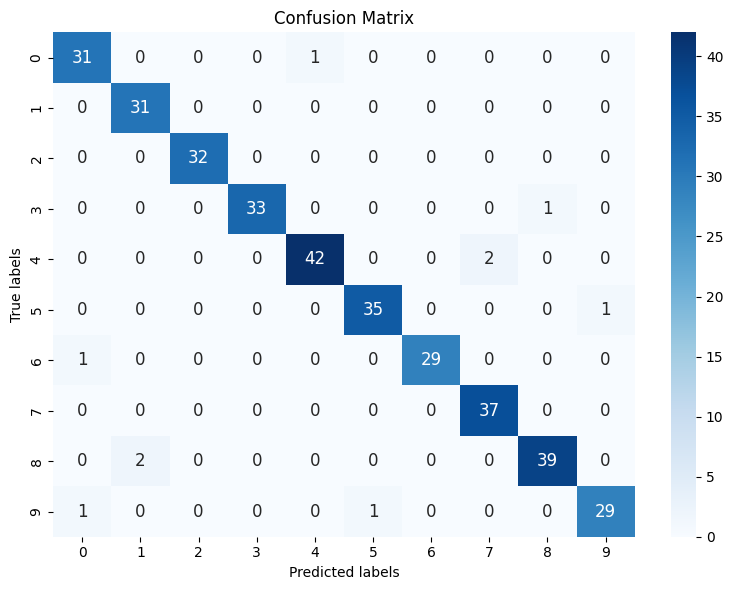

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        34
           4       0.98      0.95      0.97        44
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.98        30
           7       0.95      1.00      0.97        37
           8       0.97      0.95      0.96        41
           9       0.97      0.94      0.95        31

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = MLPClassifier(hidden_layer_sizes=(90), random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


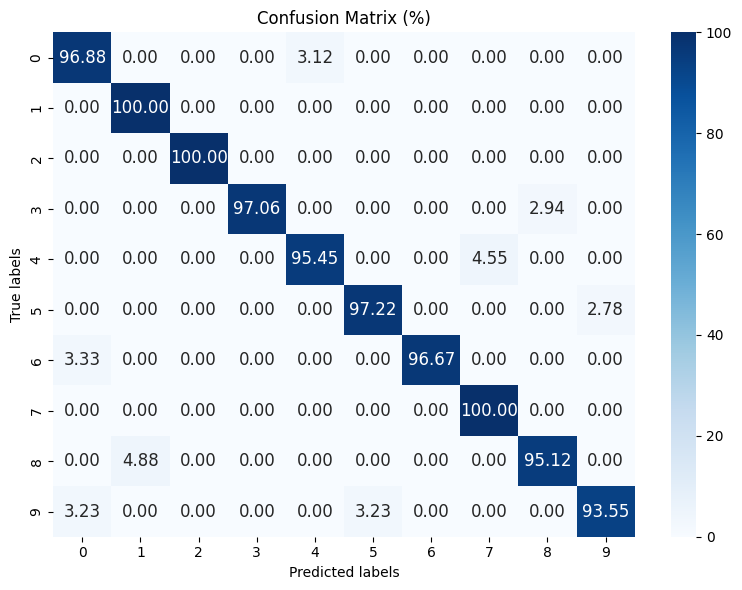

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        34
           4       0.98      0.95      0.97        44
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.98        30
           7       0.95      1.00      0.97        37
           8       0.97      0.95      0.96        41
           9       0.97      0.94      0.95        31

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = MLPClassifier(hidden_layer_sizes=(90), random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import validation_curve
# import matplotlib.pyplot as plt

# # Define the MLPClassifier model
# model = MLPClassifier(hidden_layer_sizes=(4), random_state=12, verbose=True)

# # Train the model and capture the training/validation scores and losses
# train_scores, valid_scores = validation_curve(
#     model, x_train, y_train, param_name="max_iter", param_range=[10, 50, 100, 200],
#     cv=5, scoring="accuracy", n_jobs=1
# )

# # Calculate the mean training/validation losses
# train_losses = 1 - train_scores.mean(axis=1)
# valid_losses = 1 - valid_scores.mean(axis=1)

# # Fit the model with the full training set
# model.fit(x_train, y_train)

# # Calculate the accuracy on the test set
# test_accuracy = model.score(x_test, y_test)

# # Plotting the training and validation losses
# plt.figure(figsize=(8, 6))
# plt.plot([10, 50, 100, 200], train_losses, label='Training loss')
# plt.plot([10, 50, 100, 200], valid_losses, label='Validation loss')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Loss')
# plt.title('Training and Validation Losses')
# plt.legend()
# plt.show()

# print(f"Test Accuracy: {test_accuracy}")


## `LogisticRegression()`

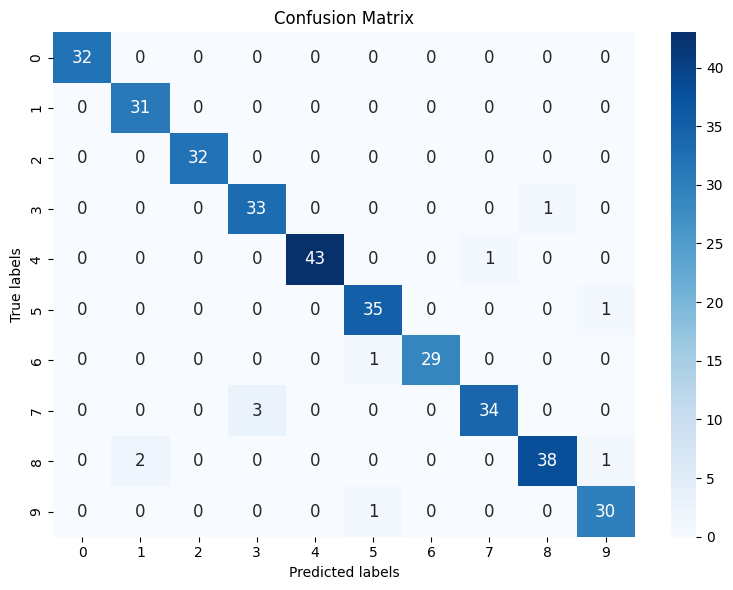

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        32
           3       0.92      0.97      0.94        34
           4       1.00      0.98      0.99        44
           5       0.95      0.97      0.96        36
           6       1.00      0.97      0.98        30
           7       0.97      0.92      0.94        37
           8       0.97      0.93      0.95        41
           9       0.94      0.97      0.95        31

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = LogisticRegression(max_iter=1000, random_state=12)
# model = LogisticRegression(max_iter=10000, random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


## `RBF()`

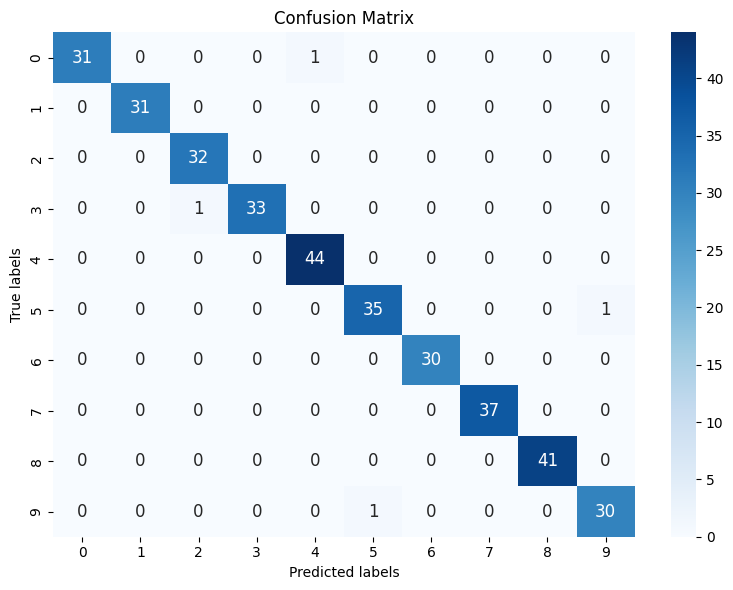

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        31
           2       0.97      1.00      0.98        32
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        44
           5       0.97      0.97      0.97        36
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        41
           9       0.97      0.97      0.97        31

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348



In [73]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've trained your model already
model = SVC(kernel='rbf', random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [72]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've trained your model already
kernel = 0.1 * RBF(0.1)  # Define the RBF kernel
model = GaussianProcessClassifier(kernel=kernel, random_state=12)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


### Others!

In [62]:
model = MLPClassifier(hidden_layer_sizes=(90), max_iter=10, random_state=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8908045977011494

In [63]:
model = MLPClassifier(hidden_layer_sizes=(30, 45, 30), max_iter=500, random_state=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9741379310344828

In [64]:
model = MLPClassifier(hidden_layer_sizes=(90, 30), max_iter=500, random_state=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9770114942528736

## `MLPRegressor()`

Read More About Normalization and Standardization: https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

In [2]:
X, y = load_diabetes(return_X_y=True)

print(X.shape, y.shape)
print(X, y)

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150.

In [3]:
# y = y[:, None]

# print(X.shape, y.shape)
# print(X, y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Standardize y based on the training set mean and standard deviation
y_mean = y_train.mean()
y_std = y_train.std()
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

# Check the shapes and standardized data
print("Shapes after splitting:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nScaled data:")
print("x_train_scaled:", x_train_scaled)
print("x_test_scaled:", x_test_scaled)
print("y_train_scaled:", y_train_scaled)
print("y_test_scaled:", y_test_scaled)


Shapes after splitting:
x_train shape: (353, 10)
x_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)

Scaled data:
x_train_scaled: [[-1.96759836 -0.94217861 -1.52356308 ... -0.80833703 -0.99697794
  -1.71025463]
 [-0.14818193  1.06136988  0.01886827 ... -0.04248011  0.55183965
   1.79243438]
 [ 0.07924512  1.06136988  0.22919982 ...  0.72337681  0.49582594
   0.53505884]
 ...
 [-0.90627211 -0.94217861 -1.5936736  ... -0.80833703 -0.09922388
   0.08599614]
 [-0.52722702 -0.94217861 -1.31323153 ... -0.80833703 -1.09212453
  -0.18344147]
 [ 0.45829021 -0.94217861  0.08897879 ... -0.80833703 -0.5080089
  -0.99175432]]
x_test_scaled: [[-3.75608986e-01 -9.42178611e-01 -1.00941930e+00 -2.08537283e+00
  -1.59997583e+00 -1.25557692e+00 -3.95626065e-01 -8.08337029e-01
  -1.09212453e+00 -9.91754322e-01]
 [ 2.30863156e-01 -9.42178611e-01 -2.84943967e-01  6.11285145e-01
  -4.06694395e-01 -1.24372926e-01 -9.96297036e-01  7.23376811e-01
   4.81438851e-01 -9.36289355e-02]
 [-1.43693523e+0

In [13]:
x_train = x_train_scaled
x_test = x_test_scaled
y_train = y_train_scaled
y_test = y_test_scaled
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [9]:
model = MLPRegressor(hidden_layer_sizes=(15), max_iter=2000, learning_rate_init=0.01, random_state=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3681664341212856

### Attributes

In [10]:
model.coefs_

[array([[-5.16993579e-01,  6.34883003e-01, -3.22057869e-01,
         -7.42303386e-02, -1.12118974e+00,  4.61854449e-01,
          7.49415601e-02, -9.66879770e-01,  4.47725252e-01,
         -4.00101622e-01, -3.12952055e-01,  3.08331065e-01,
          4.21396180e-01,  3.02444801e-01, -7.28363786e-01],
        [-2.70361373e-01,  5.83274530e-01,  3.94572071e-01,
          4.07963088e-01, -5.26188270e-01, -2.51502794e-02,
         -4.02900062e-01, -7.00170319e-03, -4.27968037e-01,
         -4.52265399e-01, -1.56309903e-02, -3.64956915e-01,
          8.63105787e-01, -8.70922233e-02, -3.80300385e-02],
        [ 5.28621914e-01,  3.82037258e-01, -4.14036829e-01,
         -1.07793241e-02, -6.38109601e-02,  3.65929654e-01,
          7.65272658e-02,  3.90854463e-01,  7.47494292e-02,
          9.93655473e-03,  1.43006873e-01,  4.38305897e-01,
         -3.69647078e-01,  5.59276153e-01, -1.48574482e-01],
        [ 5.09848501e-01,  1.57203444e-01, -3.90025546e-01,
         -9.77950378e-02, -1.06392426

In [11]:
[coef.shape for coef in model.coefs_]

[(10, 15), (15, 1)]

In [12]:
model.intercepts_

[array([-0.12475943,  0.21659586, -0.35795912,  0.47581617,  0.77744487,
        -0.86131812, -0.17772047,  0.75118998,  0.20236642, -0.57390961,
        -0.31937613,  0.26685121, -0.81678524, -0.09416075,  0.27756926]),
 array([0.25510219])]

In [100]:
model.n_layers_

3

In [101]:
model.n_outputs_

1

# MLP (from Scratch)

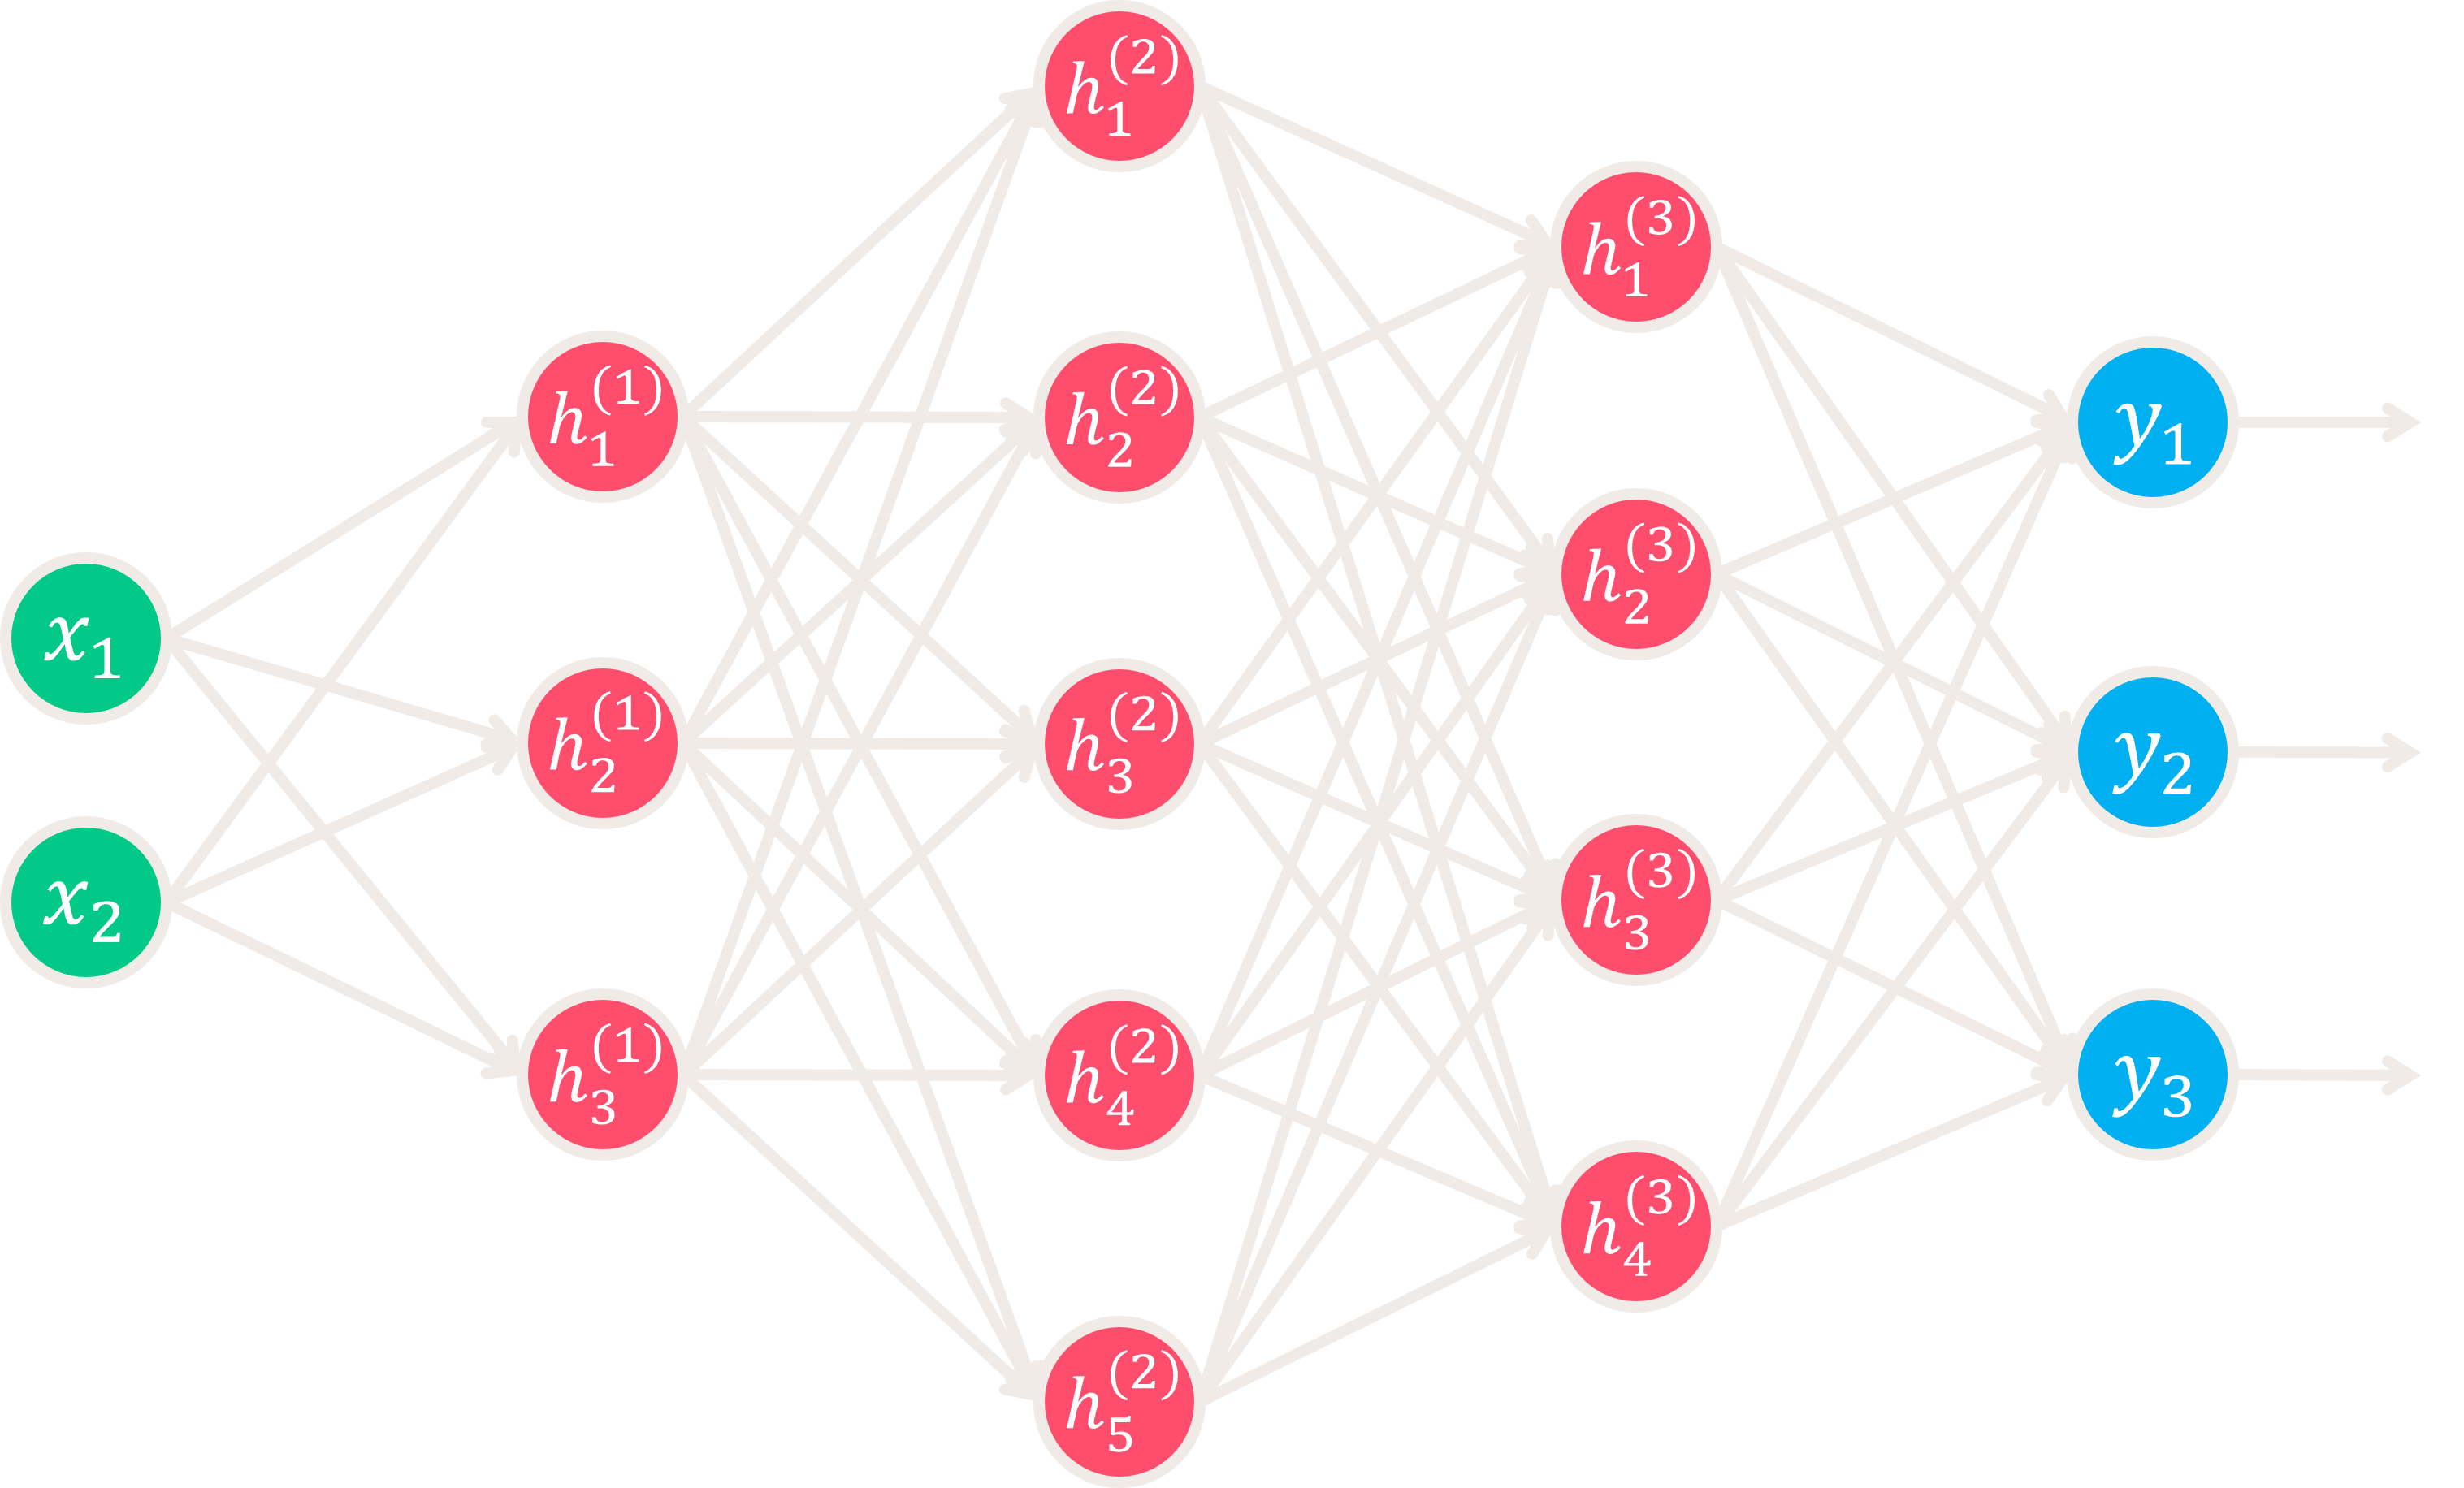

### Activation Function

In [ ]:
def linear(x):
    return x

In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def tanh(x):
    pass

### Loss

In [ ]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [ ]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [ ]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### MLP

In [ ]:
class MLP:

    def __init__(self, hidden_layer_sizes, hidden_activation='relu',
                 output_size=1, output_activation='sigmoid',
                 n_iter=1000, loss_fn=bce, eta=0.1):

        self.hidden_layer_sizes = hidden_layer_sizes  # List of hidden layer sizes
        self.hidden_activation = hidden_activation  # Activation function for hidden layers
        self.output_size = output_size  # Output layer size
        self.output_activation = output_activation  # Activation function for output layer
        self.n_iter = n_iter  # Number of iterations for training
        self.loss_fn = loss_fn  # Loss function for training
        self.eta = eta  # Learning rate

    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y):
        n, self.input_size = X.shape  # Number of samples and input size
        self._init_weights()
        for _ in range(self.n_iter):
            y_hat = self.predict(X)  # Make predictions
            loss = self.loss_fn(y, y_hat)  # Compute loss
            self._gradient_descent(X, y, y_hat)  # Update weights and biases
            print(loss)  # Print loss

    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else X.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y

    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")


In [ ]:
mlp = MLP([4, 3], output_size=1)#, output_activation=softmax)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0,
                           n_classes=2, random_state=27)

mlp.fit(X, y[:, None])
# mlp.predict(X)

4.503322806726984
2.8274570440137805
1.9292656560619825
1.4752699926018835
1.246256572247625
1.119738134555169
1.036588153510011
0.9663549696491996
0.8915732855946085
0.8106061489048412
0.7295700091180816
0.6512088744586672
0.5770967045366157
0.5096110483055147
0.4508721701686511
0.40188382607182005
0.3622597133851373
0.3306799932327225
0.30555885322306264
0.2854775169537382
0.26922939295163767
0.2558864050141359
0.24480221836482047
0.23543520562272516
0.22736576976957143
0.22034112991611
0.2141415438030407
0.20862825694945436
0.20367129015827376
0.1991799837904173
0.195101982010462
0.19145202472102552
0.18810708034839044
0.1850585692506065
0.18224038558628558
0.17964619435307574
0.177225797817856
0.17496511704580286
0.17287190794671872
0.1709425656994169
0.16912786862708126
0.16742741085907129
0.16582898288581002
0.164304613024781
0.1628617724544555
0.16149572855896885
0.16019738896480443
0.15896697412862362
0.15779815799551983
0.15667332030202244
0.15560351337845443
0.154580841955519

<AxesSubplot: >

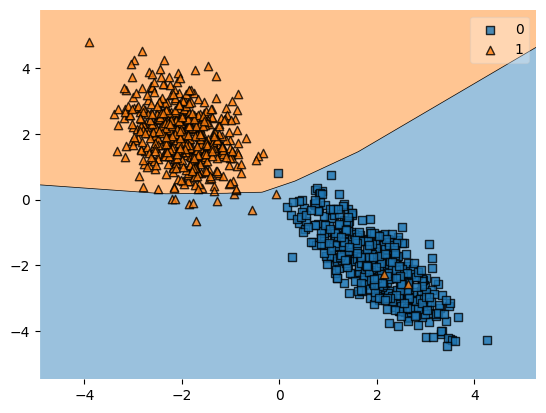

In [ ]:
plot_decision_regions(X, y, mlp)

#### XOR

In [ ]:
xor = MLP(hidden_layer_sizes=[2], hidden_activation=relu, output_size=1, output_activation=sigmoid)
xor.fit(X, y)
xor.predict(X)

array([[0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.57046882],
       [0.65504773],
       [0.79477863]])

In [ ]:
xor.ws, xor.bs

([array([[-1.36784882, -0.48372367],
         [-0.03718443,  0.16534386]]),
  array([[-0.84947972],
         [ 0.69516236]])],
 [array([-0.85563837, -0.3799835 ]), array([1.35397435])])

# Question 4 - Example



## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

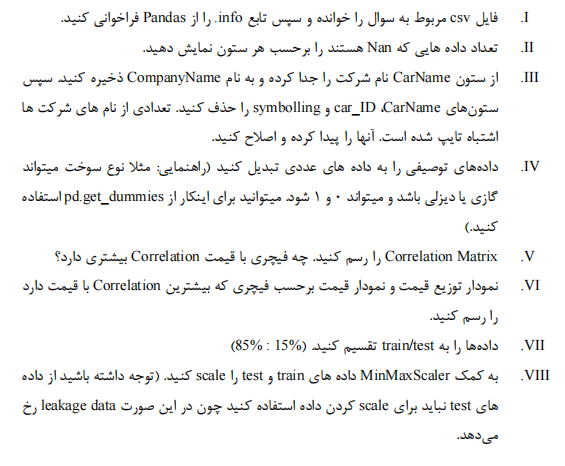

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 17KnUeG8_I9vgGU5mqym2hfFjnJPSEH-X

### 1. Read .`csv` file and then call the `.info` method from Pandas.

In [ ]:
# Load the dataset from the specified file path
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Display the first few rows of the DataFrame
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### 2. Display the number of data that are NaN for each column

In [ ]:
df.isnull().sum()

# Remove rows with any null values
# df.dropna(inplace=True)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### 3.

a.   Separate the company name from the CarName column<br/>
b.   Delete the CarName, car_ID and symbolling columns<br/>
c.   Find misspelled words and replace them






In [ ]:
# Extract the "CarName" column
CarName = df["CarName"]

# Count the occurrences of each unique car name
CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [ ]:
# Initialize an empty list to store company names
CompanyName = []

# Loop through each car name in the 'CarName' column
for car_name in df['CarName']:
    word = car_name.split()[0]  # Split the car name into a list of words using a space as the delimiter and take the first word
    CompanyName.append(word)

# Convert the list to a DataFrame
CompanyName = pd.DataFrame(CompanyName)

# Insert the 'CompanyName' column at index 2
df.insert(2, "CompanyName", CompanyName[0])

# SHow the unique set of company names from the 'CompanyName' column
set(df['CompanyName'])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [ ]:
# Drop the specified columns from the DataFrame
df = df.drop(['car_ID', 'symboling', 'CarName'], axis=1)

In [ ]:
# Convert all company names to lowercase for consistency
df['CompanyName'] = df['CompanyName'].str.lower()

# Replace misspelled company names
df['CompanyName'].replace('maxda','mazda',inplace=True)    # Replace "maxda" with "mazda"
df['CompanyName'].replace('porcshce','porsche',inplace=True)   # Replace "porcshce" with "porsche"
df['CompanyName'].replace('vw','volkswagen',inplace=True)      # Replace "vw" with "volkswagen"
df['CompanyName'].replace('vokswagen','volkswagen',inplace=True)     # Replace "vokswagen" with "volkswagen"
df['CompanyName'].replace('toyouta','toyota',inplace=True)          # Replace "toyouta" with "toyota"


In [ ]:
df

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### 4. Convert descriptive data to numerical data

In [ ]:
# List of specified categorical columns
dummy = ['doornumber', 'cylindernumber', 'CompanyName', 'fuelsystem', 'fueltype',
         'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype']

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

# Display the first few rows of the modified DataFrame
df2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0


### 5. Correlation Matrix

In [ ]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df2.corr()['price'].sort_values(ascending=False)
correlation_matrix

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 64, dtype: float64

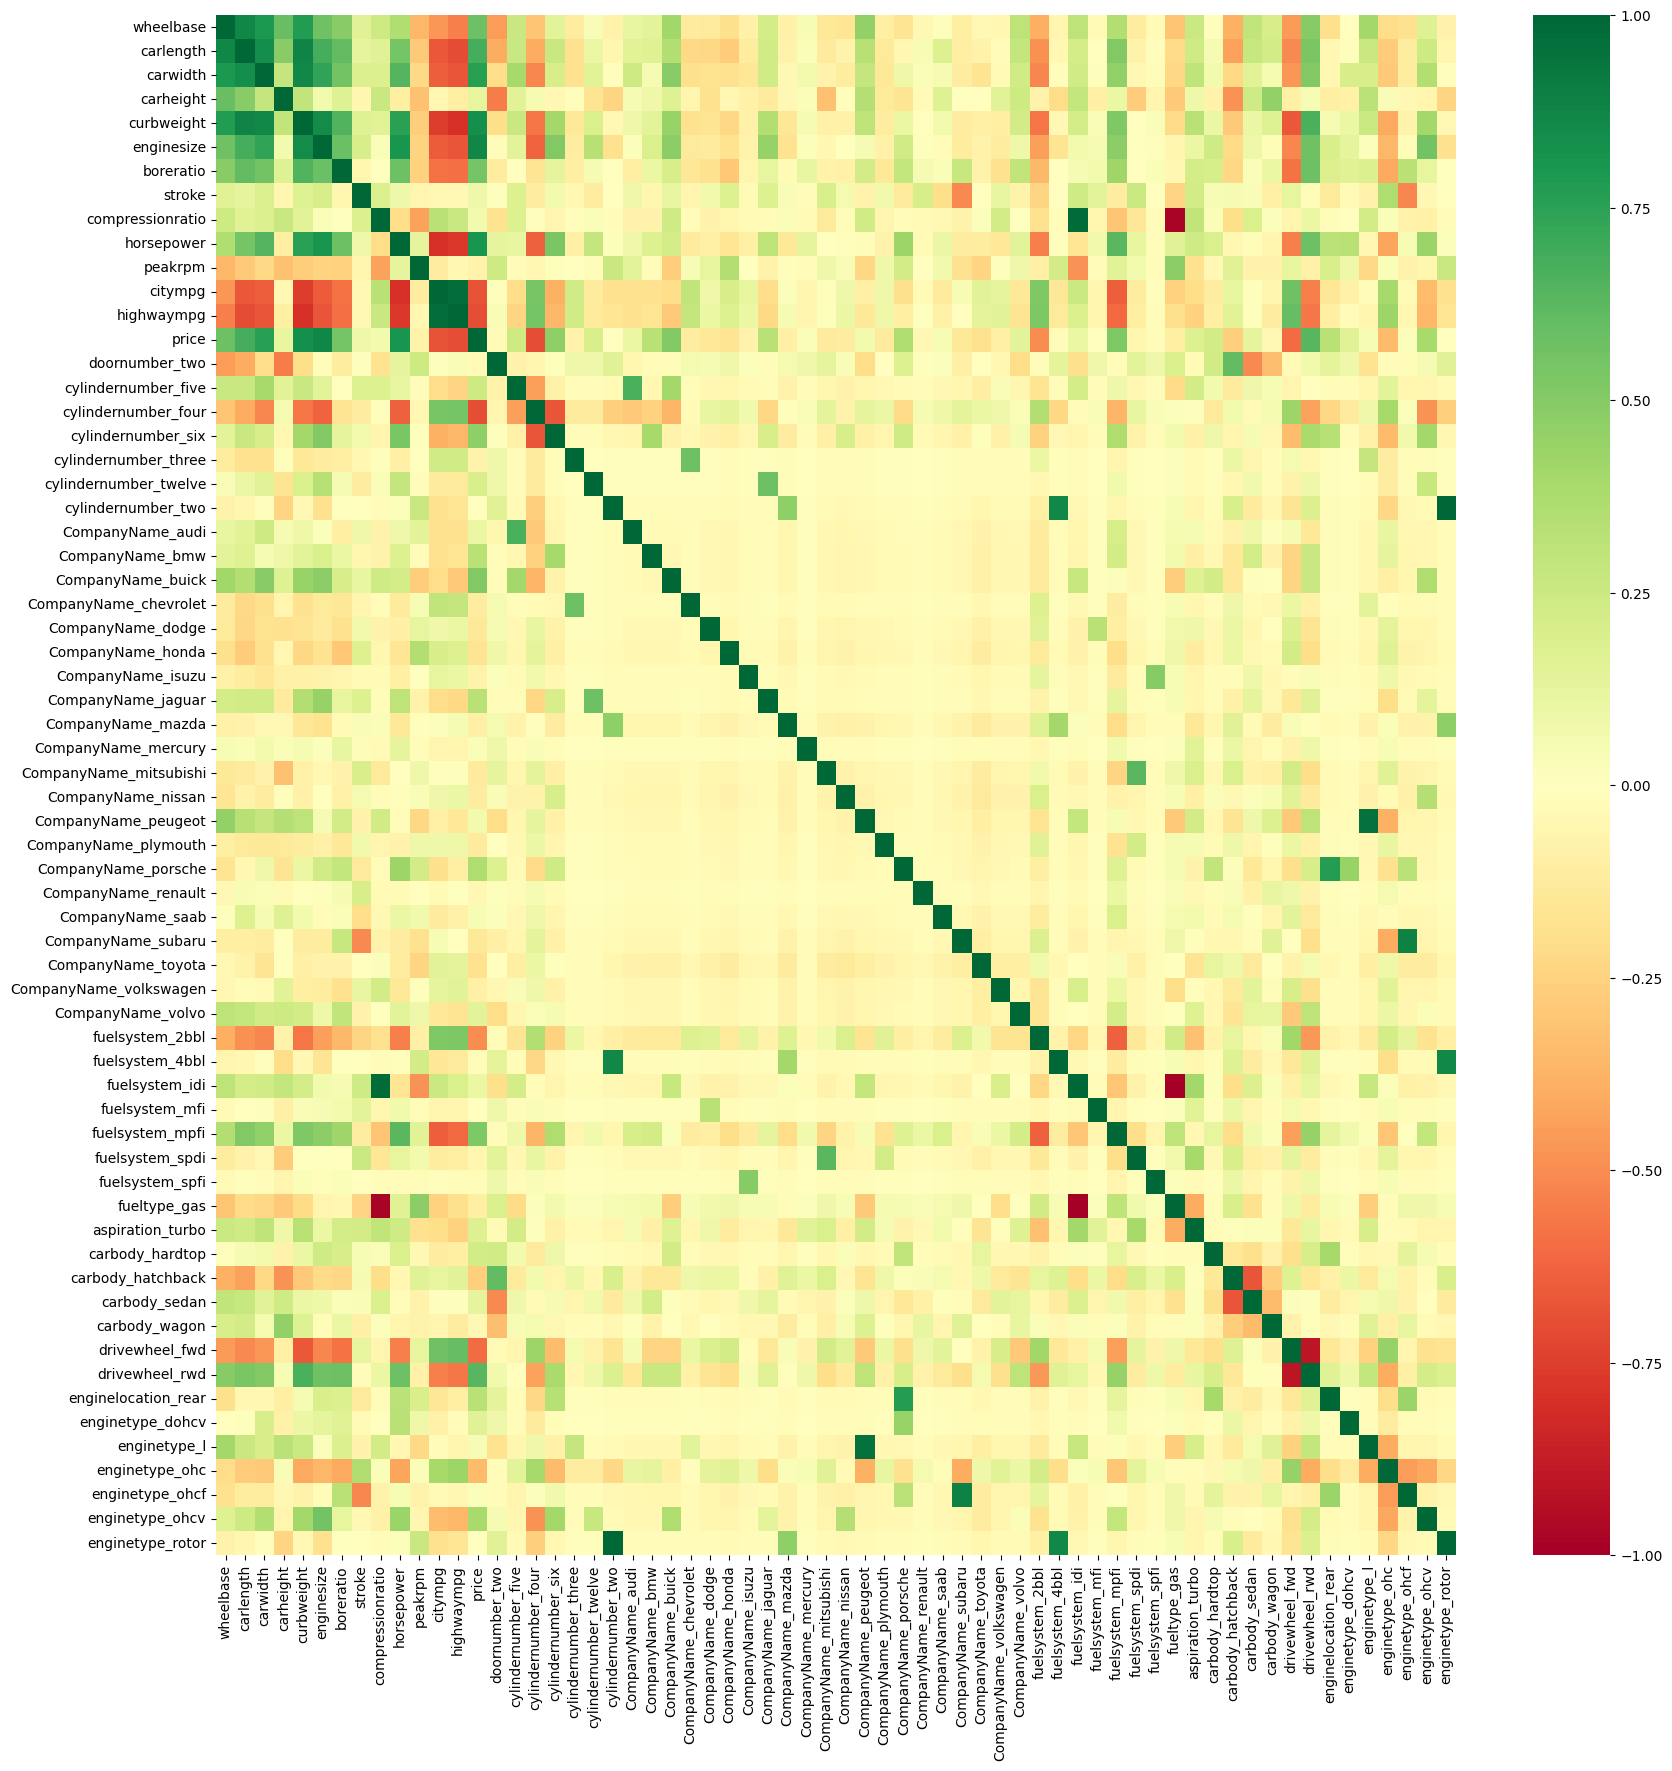

In [ ]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), cmap="RdYlGn")
plt.show()

In [ ]:
# Select columns with numerical data types
num = df.select_dtypes(exclude=['object']).columns
num

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<Axes: >

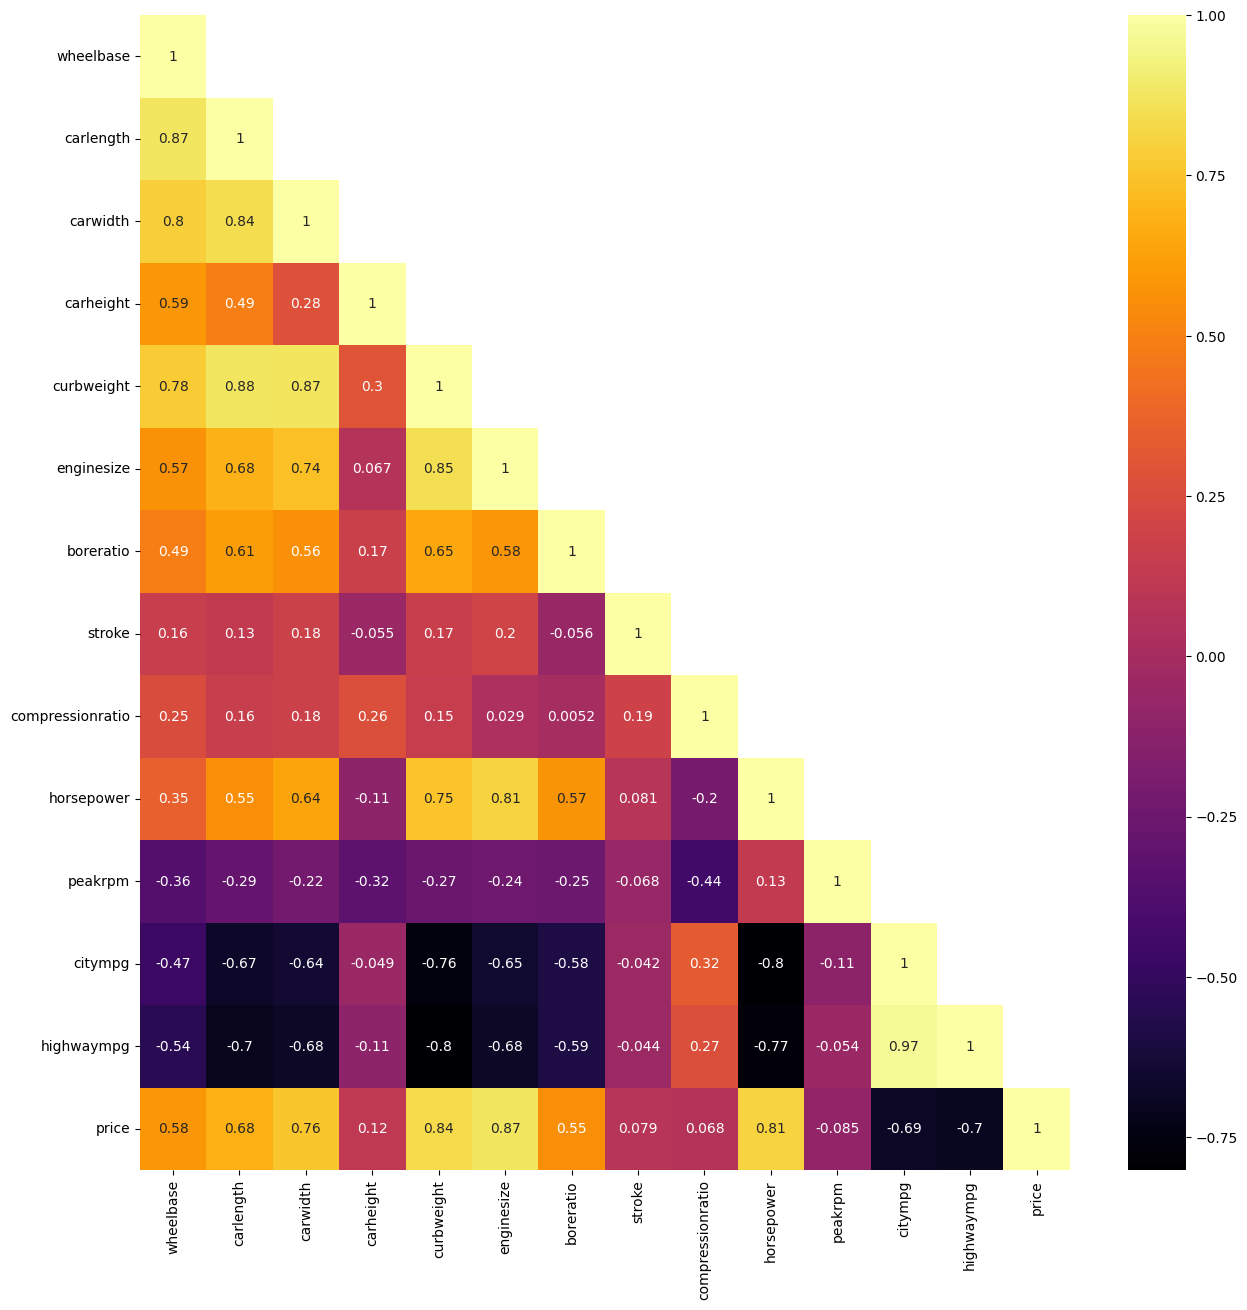

In [ ]:
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))

### Plot Distribution

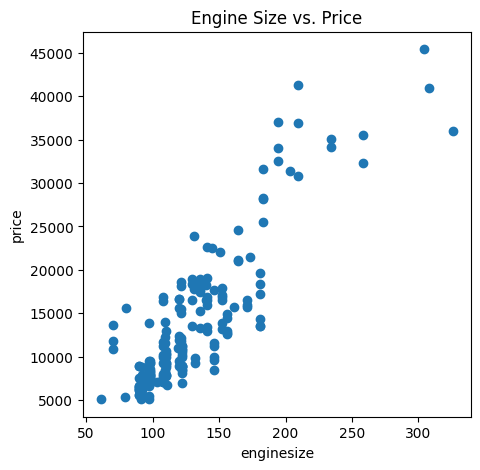

In [ ]:
# Create a scatter plot of enginesize against price
plt.figure(figsize=(5, 5))
plt.scatter(x='enginesize', y='price', data=df2)
plt.xlabel('enginesize')
plt.title('Engine Size vs. Price')
plt.ylabel('price')
plt.show()

### Distribution of Numeric Variables

Text(0.5, 1.0, 'price Interval')

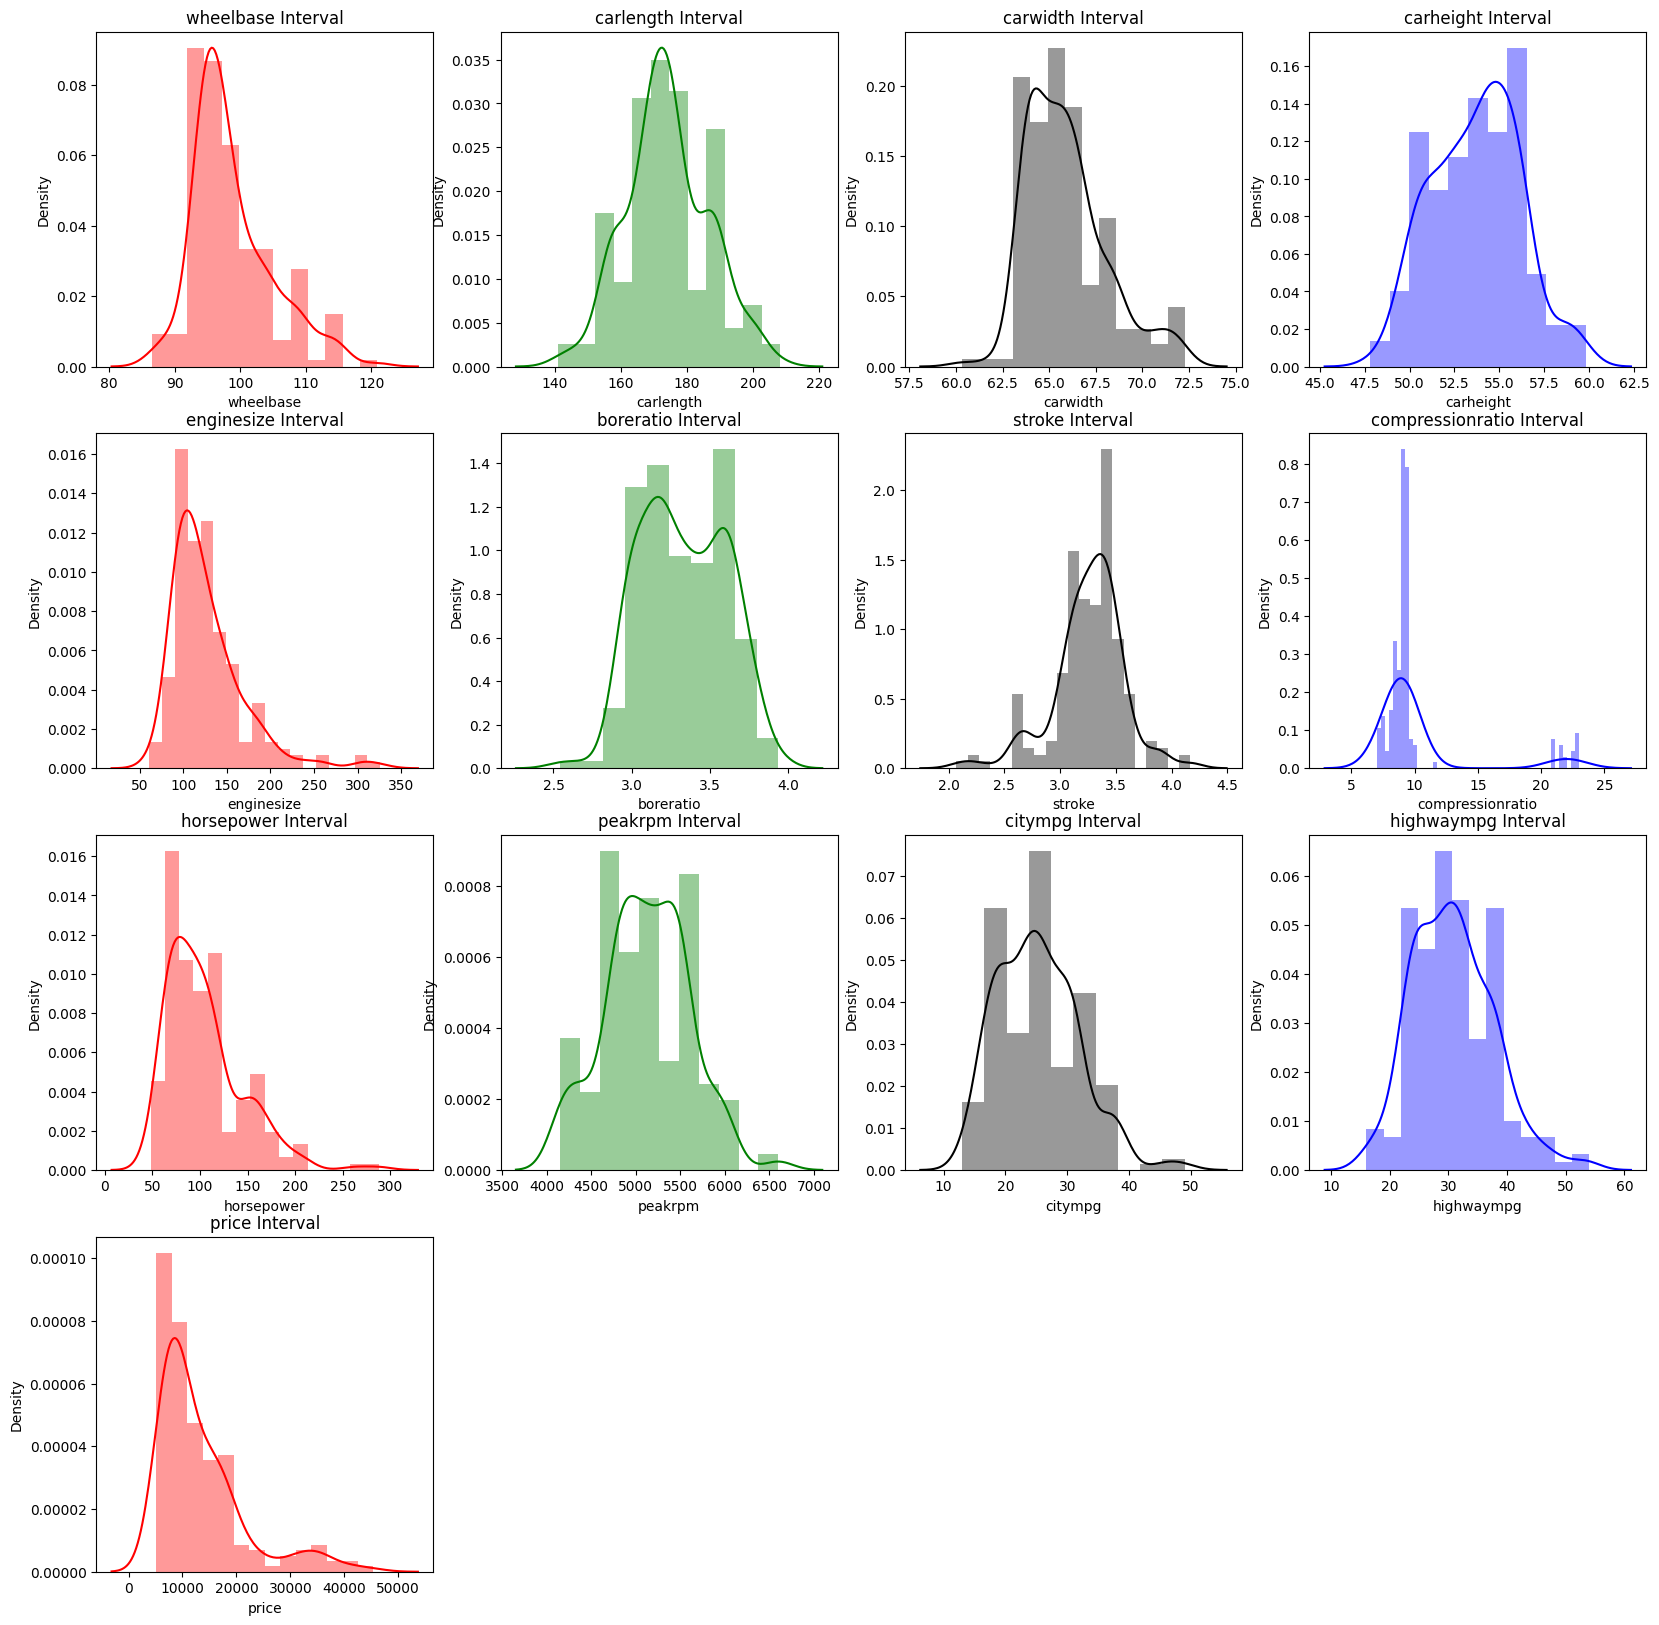

In [ ]:
# Create a 4x4 grid of subplots for various numerical variables
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
sns.distplot(df['wheelbase'], color="red").set_title('wheelbase Interval')

plt.subplot(4,4,2)
sns.distplot(df['carlength'], color="green").set_title('carlength Interval')

plt.subplot(4,4,3)
sns.distplot(df['carwidth'], color="black").set_title('carwidth Interval')

plt.subplot(4,4,4)
sns.distplot(df['carheight'], color="blue").set_title('carheight Interval')

plt.subplot(4,4,5)
sns.distplot(df['enginesize'], color="red").set_title('enginesize Interval')

plt.subplot(4,4,6)
sns.distplot(df['boreratio'], color="green").set_title('boreratio Interval')

plt.subplot(4,4,7)
sns.distplot(df['stroke'], color="black").set_title('stroke Interval')

plt.subplot(4,4,8)
sns.distplot(df['compressionratio'], color="blue").set_title('compressionratio Interval')

plt.subplot(4,4,9)
sns.distplot(df['horsepower'], color="red").set_title('horsepower Interval')

plt.subplot(4,4,10)
sns.distplot(df['peakrpm'], color="green").set_title('peakrpm Interval')

plt.subplot(4,4,11)
sns.distplot(df['citympg'], color="black").set_title('citympg Interval')

plt.subplot(4,4,12)
sns.distplot(df['highwaympg'], color="blue").set_title('highwaympg Interval')

plt.subplot(4,4,13)
sns.distplot(df['price'], color="red").set_title('price Interval')

### Split and Normalize Data

In [ ]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

df2

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,1,0,0,0,1,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,1,0,0,0,1,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,1,0,0,0,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# Separate input (X) and output (Y) data
X = df2.drop(["price"], axis=1)  # Input data
Y = df2["price"]                  # Output data

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

In [ ]:
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (174, 63)
X Test Scaler :  (31, 63)
Y Train Scaler :  (174,)
Y Test Scaler :  (31,)


In [ ]:
# Find the maximum value in y_train data
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

minmax normalization
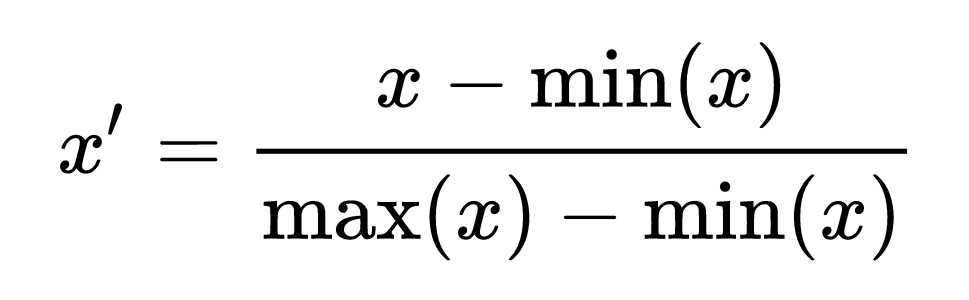

In [ ]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [ ]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

## Multi-Layer Perceptron

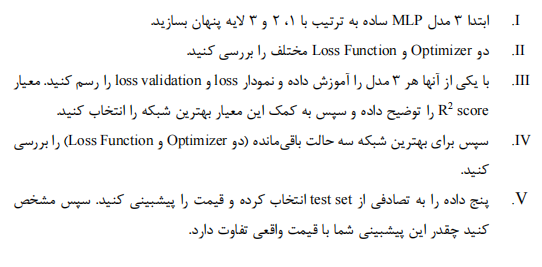

### MLP with 1 hidden layer

In [ ]:
# Initialize the Sequential model
model_1 = Sequential()

# Add a hidden layer with 50 neurons and ReLU activation function
model_1.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add an output layer with 1 neuron and linear activation function
model_1.add(Dense(1, activation='linear'))

model_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                3200      
                                                                 
 dense_61 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3251 (12.70 KB)
Trainable params: 3251 (12.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MLP with 2 hidden layer

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 50)                3200      
                                                                 
 dense_63 (Dense)            (None, 30)                1530      
                                                                 
 dense_64 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MLP with 3 hidden layer

In [ ]:
model_3 = Sequential()

# Add the first hidden layer with 50 neurons and ReLU activation function
model_3.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_3.add(Dense(30, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 50)                3200      
                                                                 
 dense_66 (Dense)            (None, 30)                1530      
                                                                 
 dense_67 (Dense)            (None, 10)                310       
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5051 (19.73 KB)
Trainable params: 5051 (19.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit model_1

In [ ]:
model_1.compile(optimizer='adam', loss='mse')

history = model_1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 0.1418 - val_loss: 0.0747
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0576 - val_loss: 0.0579
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0377 - val_loss: 0.0482
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0261 - val_loss: 0.0391
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0332
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0286
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0245
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0211
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0191
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0166
Epoch 11

In [ ]:
#Evaluate the model
loss = model_1.evaluate(x_test , y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0168


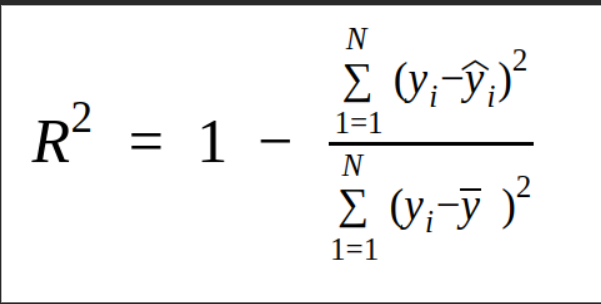

In [ ]:
y_pred_1 = model_1.predict(x_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

1/1 [==============================] - 0s 49ms/step


0.6251987418288564

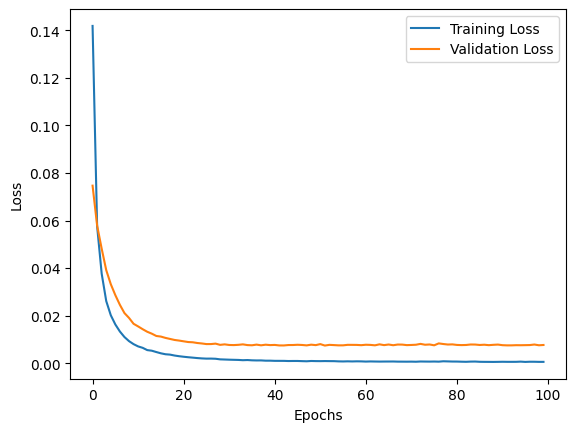

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

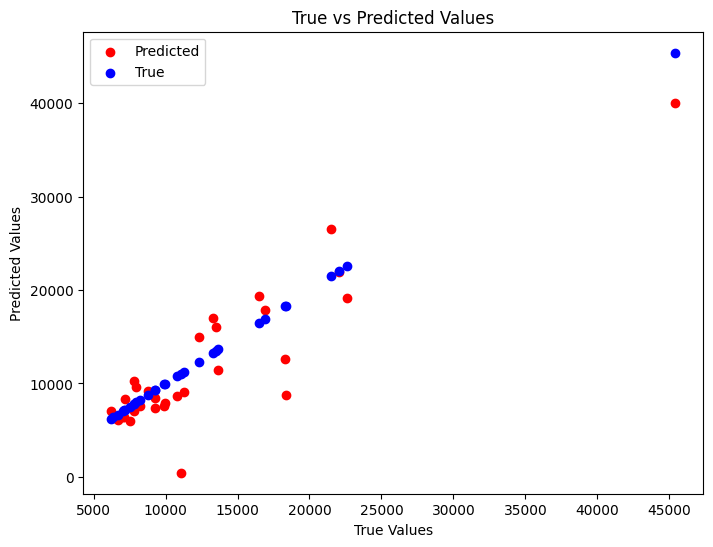

In [ ]:
import matplotlib.pyplot as plt

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_1)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
y_test_unscaled[0]

array([9279.])

In [ ]:
y_pred_unscaled[0]

array([7367.948], dtype=float32)

In [ ]:
errors[0]

array([1911.05175781])

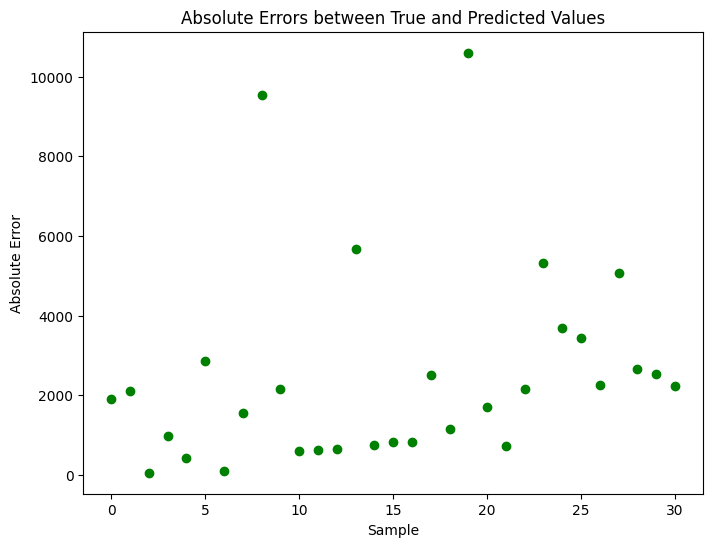

In [ ]:
import numpy as np

# Calculate errors between true and predicted values
errors = np.abs(y_test_unscaled - y_pred_unscaled)

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Absolute Errors between True and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.show()


In [ ]:
# Initialize the Sequential model
model_1 = Sequential()

# Add a hidden layer with 50 neurons and ReLU activation function
model_1.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add an output layer with 1 neuron and linear activation function
model_1.add(Dense(1, activation='linear'))

model_1.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Initialize the Sequential model
model_1 = Sequential()

# Add a hidden layer with 50 neurons, ReLU activation function, dropout, and L2 regularization
model_1.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],),
                  kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization added
model_1.add(Dropout(0.2))  # Dropout added

# Add an output layer with 1 neuron and linear activation function
model_1.add(Dense(1, activation='linear'))

model_1.summary()


In [ ]:
model_1.compile(optimizer='adam', loss='mse')

history = model_1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr  # Keep initial learning rate for the first 10 epochs
    else:
        return lr * tf.math.exp(-0.1)  # Exponentially decrease lr after 10 epochs

lr_scheduler = LearningRateScheduler(lr_schedule)

# Model compilation
model_1.compile(optimizer='adam', loss='mse')

# Define a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Training with callbacks
history = model_1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10,
                      callbacks=[reduce_lr, early_stop, lr_scheduler, checkpoint])


### Fit model_2

In [ ]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)

In [ ]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.0078


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)

rscore_2

1/1 [==============================] - 0s 53ms/step


0.8263285968876632

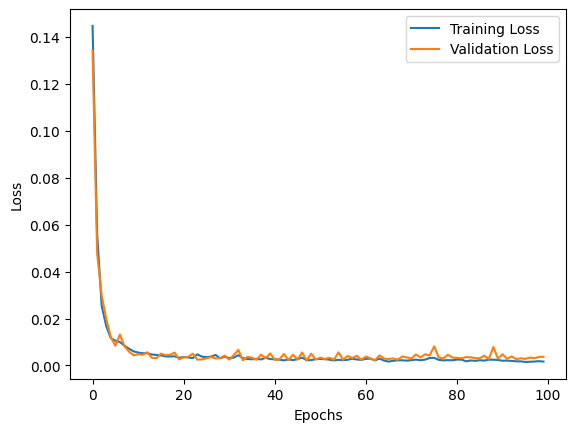

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Fit model_3

In [ ]:
model_3.compile(optimizer='adam', loss='mse')

history = model_3.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

In [ ]:
# Evaluate the model
loss = model_3.evaluate(x_test , y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.0084


In [ ]:
y_pred_3 = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3)

rscore_3

1/1 [==============================] - 0s 63ms/step


0.8125831036049962

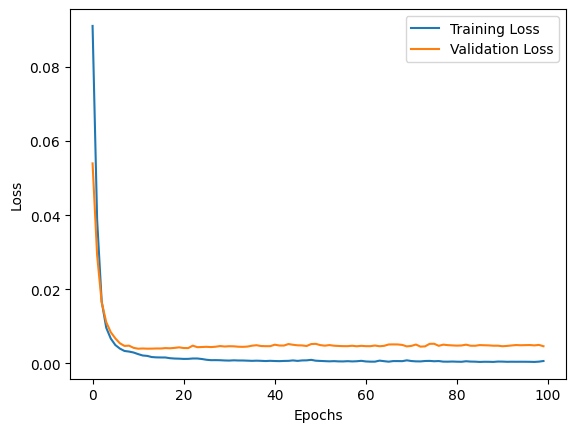

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Different losses and optimizers for model_2

### Adam + MAE

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 50)                3200      
                                                                 
 dense_70 (Dense)            (None, 30)                1530      
                                                                 
 dense_71 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model with Adam optimizer and Mean Absolute Error (MAE) loss
model_2.compile(optimizer='adam', loss='mae')

history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

loss = model_2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.0599


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

1/1 [==============================] - 0s 53ms/step


0.8145732173176694

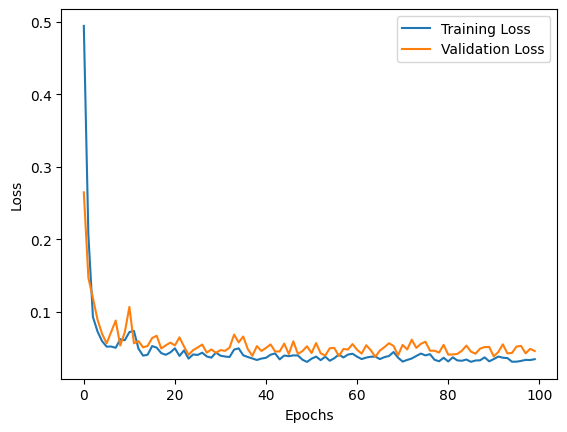

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

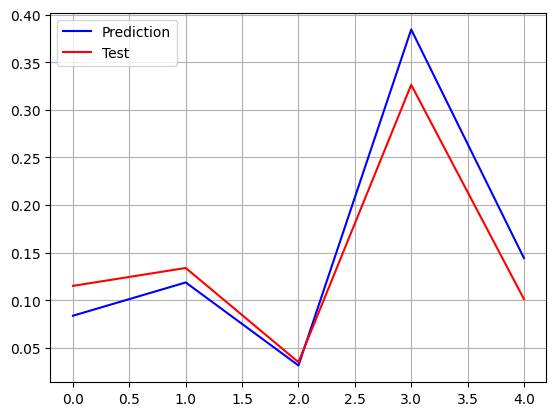

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

### SGD + MSE

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 50)                3200      
                                                                 
 dense_73 (Dense)            (None, 30)                1530      
                                                                 
 dense_74 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with stochastic gradient descent optimizer and mean square error loss
model_2.compile(optimizer = 'sgd',loss = 'mse')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 36ms/step - loss: 0.0129


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

1/1 [==============================] - 0s 74ms/step


0.7117211430592916

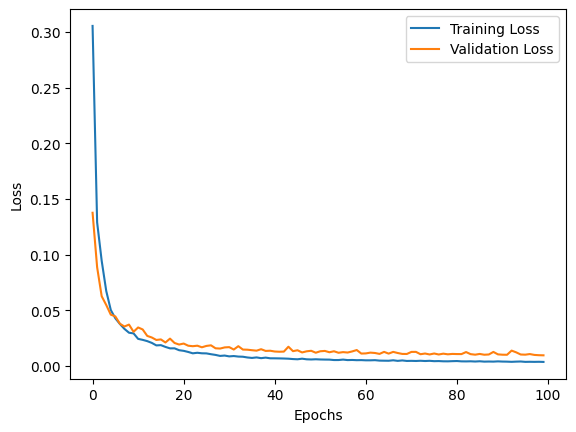

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

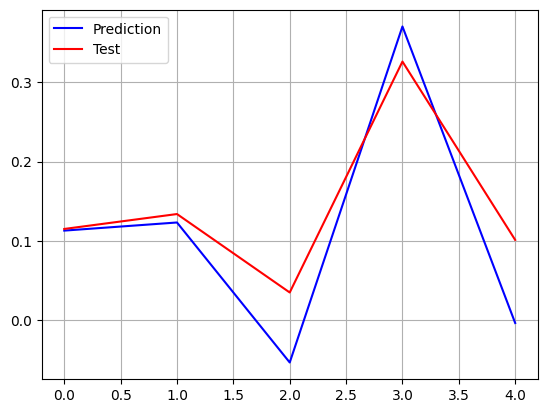

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

### SGD + MAE

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 50)                3200      
                                                                 
 dense_76 (Dense)            (None, 30)                1530      
                                                                 
 dense_77 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with stochastic gradient descent optimizer and mean absolute error loss
model_2.compile(optimizer = 'sgd',loss = 'mae')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.0634


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

1/1 [==============================] - 0s 88ms/step


0.8063821018685213

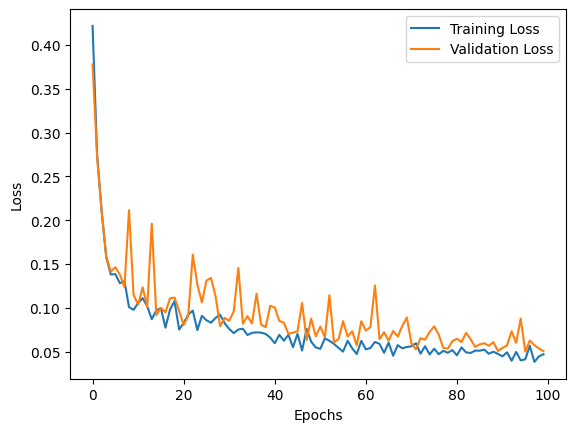

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

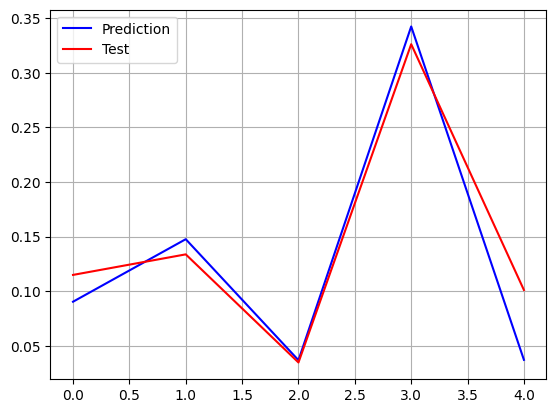

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

## Prediction

In [ ]:
# Calculate the range of the output values
a = maximum - minimum

# Convert predicted values back to the original scale
y_pred_true = a * (y_pred_2)
y_pred_true_1 = y_pred_true + minimum

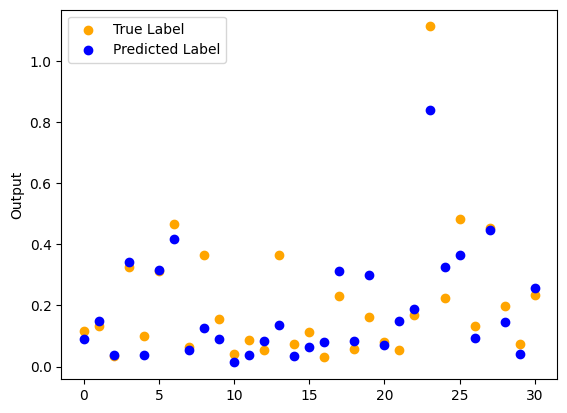

In [ ]:
# Create a scatter plot for true and predicted outputs
plt.scatter(range(len(y_test)), y_test, color="orange")  # True labels in orange
plt.scatter(range(len(y_test)), y_pred_2, color="blue")  # Predicted labels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()